<h2><font color="gray">Prepared by: Muhammet Eren KÜÇÜK</font></h2>


<h1 style="color: firebrick; font-family: verdana"><b>Problem Definition</b></h1>

<p style="font-family: verdana">Implement a news articles classification model using the <b>Naive Bayes</b> algorithm. Our objectives are to be familiar with the <b>Bag of Words (BoW)</b> method with use of the tokenization of sentences and the Naive Bayes algorithm (which will be implemented by hand).</p>

<p style="font-family: verdana">Naive Bayes classifiers are based on the Bayes Theorem and they're practically both simple and effective. They're <b>probabilistic</b> classifiers, meaning that the predictions are made on the basis of the probability of an object.</p>

<p style="font-family: verdana">For the assignment, we've given a dataset that consists of 1490 news articles, each article having the ArticleID, Text and Category attributes. For the Category attribute, we have 5 possible values for the articles (only one of them can be written as a value for a specific article): <b>business, tech, politics, sport and entertainment</b>. We need to analyze which words appear more frequently than the others for each category using <b>unigram and bigram BoW</b> and implementing a Naive Bayes classifier to make a prediction model with the obtained occurences of words.</p>

<h1 style="color: firebrick; font-family: verdana"><b>PART 1: Understanding the Data</b></h1>

<p style="font-family: verdana">For this part, we'll figure out which words appear the most in each category, using our entire dataset. Since we won't build a model for now, we don't need to split our data into training and testing subdata for now. Instead, our goal is to group the dataset into categories. We'll start with importing the necessary libraries for further data analysis.</p>

In [1]:
!pip install wordcloud

In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from wordcloud import WordCloud

# If the code is run in a hardware for the 1st time, the downloads below will cause the program to run for a longer period.

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to C:\Users\Umut
[nltk_data]     Can\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Umut
[nltk_data]     Can\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Umut
[nltk_data]     Can\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Umut
[nltk_data]     Can\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<p style="font-family: verdana">As usual, we need to import the dataset first. After importing it, we need to introduce a new variable called <b>CategoryId</b>, by assigning a numeric value to each Category string value.</p>

In [3]:
def read_factorize_data():
    data = pd.read_csv("English Dataset.csv")
    data["CategoryId"] = data["Category"].factorize()[0]
    return data

<p style="font-family: verdana">We're more likely to create a more accurate model for our predictions if all classes (Category values in this dataset) are distributed equally. Before starting any further operations, we must be sure that our dataset is as evenly distributed as possible, so we're just going to plot the distribution of the articles by their categories.</p>

In [4]:
def plot_category_counts(data):
    data.groupby("Category").CategoryId.value_counts().plot(kind="bar", color=["pink", "brown", "red", "gray", "blue"])
    plt.xlabel("News Category")
    plt.title("Distribution of News by Category")
    plt.show()

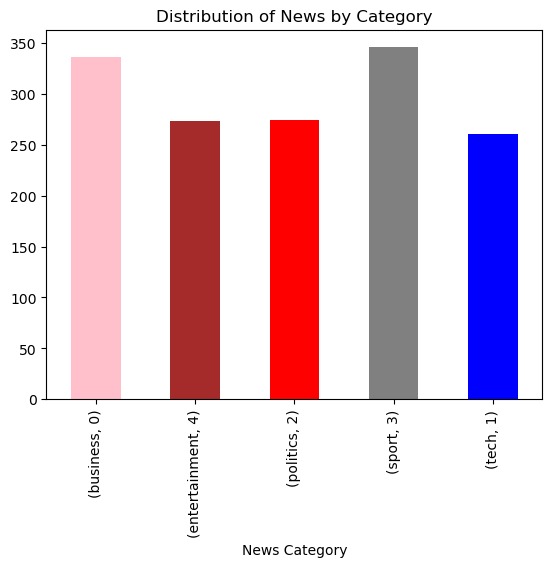

In [5]:
df = read_factorize_data()
plot_category_counts(df)

<p style="font-family: verdana">On the plot above, we can see that the articles are almost evenly distributed in between five categories, which shows that our example dataset is feasible for learning.</p>

<p style="font-family: verdana">In order to visually represent the most frequent words in a text or a paragraph, we use a visualization called a <b>word cloud</b>. Word clouds write every word in the respective text or paragraph to form a shape made of these words. The more frequent words appear bigger while the less frequent ones appear smaller. Python's WordCloud library is useful for automatically detecting the most frequent words and visualizing them with the help of the Matplotlib library. While checking for the most frequent words, we should not forget to exclude the <b>stopwords</b> to prevent the words that won't help us with the classification process from appearing in the WordCloud plots. We'll import the stopwords list from the NLTK library.</p>

In [6]:
def wordcloud_draw(dataset, category_name):
    print("Drawing words in category - " + category_name + "...")
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if (word != "news" and word != "text")])
    wordcloud = WordCloud(stopwords=stop_w, background_color="white", width=2500, height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(5.12, 5.12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("WordCloud - " + category_name, fontdict={"fontsize": 24})
    plt.show()
    print("Drawing complete!")

<p style="font-family: verdana">The last thing we'll do for this part is to plot the word clouds for each Category in the dataset.</p>

Drawing words in category - BUSINESS...


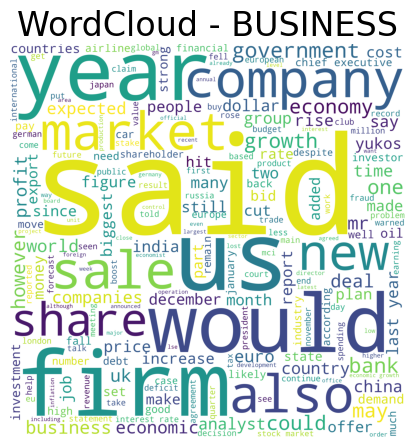

Drawing complete!
Drawing words in category - TECH...


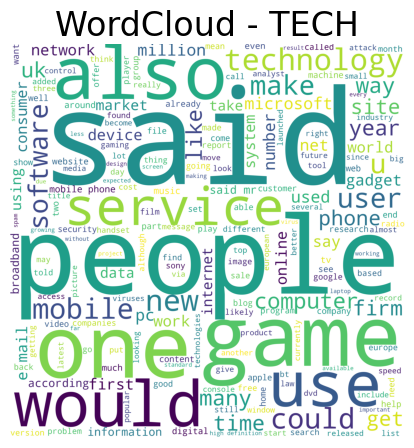

Drawing complete!
Drawing words in category - POLITICS...


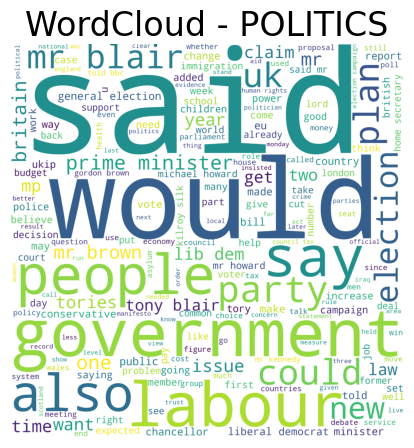

Drawing complete!
Drawing words in category - SPORT...


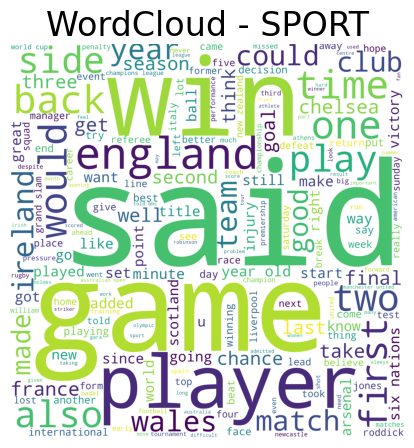

Drawing complete!
Drawing words in category - ENTERTAINMENT...


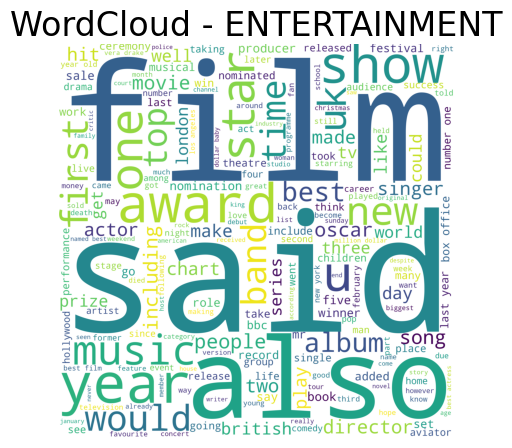

Drawing complete!


In [7]:
stop_w = stopwords.words("english")
category_names = df.Category.unique()

for i in range(0, 5):
    category_texts = df[df['CategoryId'] == i]["Text"]
    wordcloud_draw(category_texts, category_names[i].upper())

<p style="font-family: verdana">From the WordCloud plots above, we can list some of the most frequent words for each category as follows:</p>

<ul style="font-family: verdana">
    <li><b>BUSINESS:</b> said, would, year, us, <b>market</b>, <b>firm</b>, <b>company</b>, sale</li>
    <li><b>TECH:</b> said, <b>people</b>, also, game, one, would, <b>technology</b>, <b>service</b></li>
    <li><b>POLITICS:</b> said, would, <b>government</b>, <b>labour</b>, say, people, <b>plan</b>, also</li>
    <li><b>SPORT:</b> said, <b>game</b>, <b>player</b>, <b>win</b>, england, would, side, ireland</li>
    <li><b>ENTERTAINMENT:</b> said, <b>film</b>, also, <b>award</b>, year, <b>band</b>, show, star</li>
</ul>

<p style="font-family: verdana">We can expect the words above (especially the first 3 words of each category on the list above) to be the most decisive ones (words in bold are the ones that differ in between categories, not necessarily the top 3 most decisive words) when implementing the Naive Bayes classifier in the next part.</p>

<h1 style="color: firebrick; font-family: verdana"><b>PART 2: Implementing Naive Bayes</b></h1>

<p style="font-family: verdana">Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.</p>

<p style="font-family: verdana">Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:</p>

<ul style="font-family: verdana">
    <li>P(A|B) = P(B|A)P(A) / P(B), where A and B are events and P(B) != O</li>
    <li>Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as <b>evidence</b>.</li>
    <li>P(A) is the <b>priori</b> of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).</li>
    <li>P(A|B) is a <b>posteriori</b> probability of B, i.e. probability of event after evidence is seen.</li>
</ul>

<p style="font-family: verdana">An easy way to explain it is that a Naive Bayes classifier considers that the existence of one characteristic in a class has no impact on the existence of any other properties. In addition to being straightforward, Naive Bayes is known for outperforming even the most advanced classification techniques.</p>

<p style="font-family: verdana">We will represent our data with listed approaches and use them to learn a classifier via Naive Bayes algorithm. We have to implement our own Naive Bayes algorithm. We'll import the required libraries first.</p>

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

<p style="font-family: verdana">For our train and test datasets, we read and split our dataset as <b>80% train, 20% test</b>.</p>

In [9]:
# read the file with pandas library
df = pd.read_csv('English Dataset.csv')
# make dataframe to numpy array
df = df.to_numpy()
# shuffle the numpy array
np.random.shuffle(df)
# split the data as percentage 8 / 2 to train and test set
train, test = train_test_split(df, test_size=0.2)

<p style="font-family: verdana">Our Naive Bayes classifier will utilize the Bag of Words method for tokenizing the articles to split the articles into distinct words to form a dictionary. The Bag of Words method will work in either <b>unigram (separate words) or bigram (two concurrent words)</b> modes, depending on the mode argument given to the function.</p>

<p style="font-family: verdana">Using a CountVectorizer object, we'll initialize a vector from the train dataset with the given n-gram mode (unigram or bigram) and fit and transform the vector. After converting this vector to array, we'll initialize a category list which holds all articles in the train dataset. Then, we'll initialize five lists (one for each category) that holds the article IDs for each article that belongs to the respective category's list. These lists can be converted to Numpy arrays for easier and faster operations.</p>

<p style="font-family: verdana">For each category list, we'll initialize vectors for each category. After getting each category from the sum of each vector, we need to initialize and apply Laplacian smoothing to these vectors.</p>

<p style="font-family: verdana">Taking the test dataset and initializing a test vector, we need to predict their categories using the Naive Bayes formula. It's basically calculating the probabilities of each category (by taking the multiplication of the category's individual probability and it's conditional probabilities with other attribute values in the record) and taking the category that has the maximum probability as the predicted category.</p>

In [10]:
def naiveBayes(mode):
    # we firstly specify our ngram_range
    # if we select mode as unigram then ngram_range will be (1,1)
    # if we select mode as bigram then ngram_range will be (2,2)
    ngram = (0, 0)
    if mode == "unigram":
        ngram = (1, 1)
    elif mode == "bigram":
        ngram = (2, 2)
    elif mode == "uni-bigram":
        ngram = (1, 2)
    else:
        print("set valid mode")
    # we initialize CountVectorizer with ngram_mode
    vectorizer = CountVectorizer(ngram_range=ngram)
    # we initialize a vector which includes all words and their counts for each item
    train_vector = vectorizer.fit_transform(train[:, 1])
    # we make vector to array to use
    count_vector = train_vector.toarray()
    # we initialize a list which have all category and count
    categoryList = list(train[:, 2])
    # we initialize a list and variable for each category
    # to use on probability
    businessList, politicsList, techList, entList, sportList = [], [], [], [], [],
    bus, pol, tech, ent, spo = 0, 0, 0, 0, 0
    for i in categoryList:
        if i == "business":
            bus += 1
            businessList.append(True)
            politicsList.append(False)
            techList.append(False)
            entList.append(False)
            sportList.append(False)
        elif i == "politics":
            pol += 1
            businessList.append(False)
            politicsList.append(True)
            techList.append(False)
            entList.append(False)
            sportList.append(False)
        elif i == "tech":
            tech += 1
            businessList.append(False)
            politicsList.append(False)
            techList.append(True)
            entList.append(False)
            sportList.append(False)
        elif i == "entertainment":
            ent += 1
            businessList.append(False)
            politicsList.append(False)
            techList.append(False)
            entList.append(True)
            sportList.append(False)
        elif i == "sport":
            spo += 1
            businessList.append(False)
            politicsList.append(False)
            techList.append(False)
            entList.append(False)
            sportList.append(True)

    # make our lists to numpy array to be faster
    businessList = np.array(businessList)
    politicsList = np.array(politicsList)
    techList = np.array(techList)
    entList = np.array(entList)
    sportList = np.array(sportList)
    # we initialize vectors for each category
    # the train_vector has all words and counts for each category
    # so we just take it from the train_vector for related category
    business_vector = train_vector[businessList]
    politics_vector = train_vector[politicsList]
    tech_vector = train_vector[techList]
    entertainment_vector = train_vector[entList]
    sport_vector = train_vector[sportList]
    # instead of a loop we can use this method
    # to get number of each category from sum of vector
    n_business = np.sum(business_vector)
    n_politics = np.sum(politics_vector)
    n_tech = np.sum(tech_vector)
    n_entertainment = np.sum(entertainment_vector)
    n_sport = np.sum(sport_vector)

    # bus_mtx = makeMatrix(business_vector)
    # pol_mtx = makeMatrix(politics_vector)
    # tech_mtx = makeMatrix(tech_vector)
    # ent_mtx = makeMatrix(entertainment_vector)
    # spo_mtx = makeMatrix(sport_vector)

    # we initialize shape of count vector for Laplace Smoothing
    _, D = count_vector.shape
    # we initialize alpha for Laplace Smoothing
    alpha = 1
    # we sum the column values of the vectors and get the matrix for each category
    # we make the progress of sum column values with axis = 0
    bus_mtx = np.sum(business_vector, axis=0)
    pol_mtx = np.sum(politics_vector, axis=0)
    tech_mtx = np.sum(tech_vector, axis=0)
    ent_mtx = np.sum(entertainment_vector, axis=0)
    spo_mtx = np.sum(sport_vector, axis=0)
    # apply laplace smoothing
    # we sum alpha and matrix values for each matrix and divide to sum of number of each category and count_vector shape
    # then, we take the log value of this process and we get matrix
    # lastly, we make the matrix to array
    bus_arr = (np.log((bus_mtx + alpha) / (n_business + D))).A1
    pol_arr = (np.log((pol_mtx + alpha) / (n_politics + D))).A1
    tech_arr = (np.log((tech_mtx + alpha) / (n_tech + D))).A1
    ent_arr = (np.log((ent_mtx + alpha) / (n_entertainment + D))).A1
    spo_arr = (np.log((spo_mtx + alpha) / (n_sport + D))).A1
    # we initialize test_vector from our test set to use on prediction
    test_vector = vectorizer.transform(test[:, 1])
    # we initialize a list which name is preds to store predict values.
    preds = []
    for i in test_vector:
        colList = []
        for _, col in zip(*i.nonzero()):
            colList.append(col)
        colList = np.array(colList)
        # we calculate our probability for each category
        allCategory = bus + pol + tech + ent + spo
        prob_business = np.log(bus / allCategory)
        prob_politics = np.log(pol / allCategory)
        prob_tech = np.log(tech / allCategory)
        prob_entertainment = np.log(ent / allCategory)
        prob_sport = np.log(spo / allCategory)
        # we calculate sum of arr colList for each category
        sum_business = bus_arr[colList].sum()
        sum_politics = pol_arr[colList].sum()
        sum_tech = tech_arr[colList].sum()
        sum_sport = spo_arr[colList].sum()
        sum_entertainment = ent_arr[colList].sum()
        # Then we added sums to the probability for each category
        prob_sport += sum_sport
        prob_tech += sum_tech
        prob_politics += sum_politics
        prob_business += sum_business
        prob_entertainment += sum_entertainment
        a = prob_entertainment
        b = prob_business
        c = prob_tech
        d = prob_politics
        e = prob_sport
        # then we initialize as variable the probabilities
        # and find the which is higher than others to append to prediction list as category to predict
        # finally, we find accuracy with test set and prediction list through accuracy score.
        if a > b and a > c and a > d and a > e:
            preds.append("entertainment")
        elif b > a and b > c and b > d and b > e:
            preds.append("business")
        elif c > a and c > b and c > d and c > e:
            preds.append("tech")
        elif d > a and d > b and d > c and d > e:
            preds.append("politics")
        elif e > a and e > b and e > c and e > d:
            preds.append("sport")

    return accuracy_score(test[:, 2], preds)

<h1 style="color: firebrick; font-family: verdana"><b>PART 3: Effect of the Words on Prediction</b></h1>

<p style="font-family: verdana">After implementing our Naive Bayes classsifier with both unigram and bigram modes of BoW, we must figure out which 10 words' presence or absence are the most decisive ones in the predictions, for each category. We can improve our classification results using <b>Sklearn's TF-IDF transformer</b>.</p>

<p style="font-family: verdana">Our Naive Bayes classifier implementation will include some minor changes from Part 2. This time, we'll also give the inclusion or exclusion of stopwords (i.e. a, the, an) as an argument. For presence, we'll use unigram and for absence, we'll use bigram mode of BoW. For the vector that will hold the count of words, the TF-IDF vectorizer will be used instead of the count vectorizer class.</p>

In [11]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, ENGLISH_STOP_WORDS, TfidfVectorizer

In [12]:
# the function takes 3 parameters
# first parameter is category. "business", "politics" etc.
# second parameter is pres_or_abs. you should decide why to use presence or absence.
# third parameter is withStopWord. you should decide use StopWord or not.
def analyzeWithStopWords(category, pres_or_abs, withStopWord):
    print("\n" + category, pres_or_abs, withStopWord, "\n")
    # read the file with pandas library
    df = pd.read_csv('English Dataset.csv')
    # make dataframe to numpy array
    df = df.to_numpy()
    # we initialize a list which have all category and count
    categoryList = list(df[:, 2])
    # we initialize a list for each category
    # make for loop which indexes assigned to which category
    businessList, politicsList, techList, entList, sportList = [], [], [], [], [],
    for i in categoryList:
        if i == "business":
            businessList.append(True)
            politicsList.append(False)
            techList.append(False)
            entList.append(False)
            sportList.append(False)
        elif i == "politics":
            businessList.append(False)
            politicsList.append(True)
            techList.append(False)
            entList.append(False)
            sportList.append(False)
        elif i == "tech":
            businessList.append(False)
            politicsList.append(False)
            techList.append(True)
            entList.append(False)
            sportList.append(False)
        elif i == "entertainment":
            businessList.append(False)
            politicsList.append(False)
            techList.append(False)
            entList.append(True)
            sportList.append(False)
        elif i == "sport":
            businessList.append(False)
            politicsList.append(False)
            techList.append(False)
            entList.append(False)
            sportList.append(True)
    # make our lists to numpy array to be faster
    businessList = np.array(businessList)
    politicsList = np.array(politicsList)
    techList = np.array(techList)
    entList = np.array(entList)
    sportList = np.array(sportList)
    if category == "business":
        categoryList = businessList
    elif category == "politics":
        categoryList = politicsList
    elif category == "tech":
        categoryList = techList
    elif category == "entertainment":
        categoryList = entList
    elif category == "sport":
        categoryList = sportList
    ngram = (0, 0)
    if pres_or_abs == "presence":
        ngram = (1, 1)
    elif pres_or_abs == "absence":
        ngram = (2, 2)
    data = df[categoryList]
    # Now we are going to compute the IDF values by calling
    tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
    # With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once
    vectorizer = TfidfVectorizer(use_idf=True)
    # then we decide use stop word or not
    if withStopWord == "withStopWord":
        vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=ngram)
    elif withStopWord == "withoutStopWord":
        vectorizer = TfidfVectorizer(use_idf=True, stop_words=ENGLISH_STOP_WORDS, smooth_idf=True, ngram_range=ngram)
    # this steps generates word counts for the words
    word_count_vector = vectorizer.fit_transform(data[:, 1])
    # get the all vector out
    tf_idf_vector = np.sum(word_count_vector, axis=0)
    # place tf-idf values in a pandas data frame
    df = pd.DataFrame(tf_idf_vector.A1, index=vectorizer.get_feature_names_out(), columns=["tfidf"])
    # list the scores for just first 10 words as you mention in pdf.
    df_category = df.sort_values(by=["tfidf"], ascending=False)
    return df_category.head(10)

<p style="font-family: verdana">We need to list which 10 words for each class are useful for classifying their own respective category in their absence or presence, and with and without stopwords being included in the vectorizer.</p>

<p style="font-family: verdana">Our Naive Bayes classifier implementation will include some minor changes from Part 2. This time, we'll also give the inclusion or exclusion of stopwords (i.e. a, the, an) as an argument. For presence, we'll use unigram and for absence, we'll use bigram mode of BoW. For the vector that will hold the count of words, the TF-IDF vectorizer will be used instead of the count vectorizer class.</p>

In [13]:
print(analyzeWithStopWords("business", "presence", "withStopWord"))
print(analyzeWithStopWords("business", "presence", "withoutStopWord"))
print(analyzeWithStopWords("business", "absence", "withoutStopWord"))
print(analyzeWithStopWords("business", "absence", "withStopWord"))

print(analyzeWithStopWords("politics", "presence", "withStopWord"))
print(analyzeWithStopWords("politics", "presence", "withoutStopWord"))
print(analyzeWithStopWords("politics", "absence", "withoutStopWord"))
print(analyzeWithStopWords("politics", "absence", "withStopWord"))

print(analyzeWithStopWords("tech", "presence", "withStopWord"))
print(analyzeWithStopWords("tech", "presence", "withoutStopWord"))
print(analyzeWithStopWords("tech", "absence", "withoutStopWord"))
print(analyzeWithStopWords("tech", "absence", "withStopWord"))

print(analyzeWithStopWords("entertainment", "presence", "withStopWord"))
print(analyzeWithStopWords("entertainment", "presence", "withoutStopWord"))
print(analyzeWithStopWords("entertainment", "absence", "withoutStopWord"))
print(analyzeWithStopWords("entertainment", "absence", "withStopWord"))

print(analyzeWithStopWords("sport", "presence", "withStopWord"))
print(analyzeWithStopWords("sport", "presence", "withoutStopWord"))
print(analyzeWithStopWords("sport", "absence", "withoutStopWord"))
print(analyzeWithStopWords("sport", "absence", "withStopWord"))


business presence withStopWord 

          tfidf
the   77.648085
to    35.559403
in    31.440011
of    31.063073
and   23.397534
said  13.301961
that  12.636499
is    12.592363
it    12.521667
for   12.238585

business presence withoutStopWord 

             tfidf
said     14.725026
year      8.521979
mr        8.515106
growth    7.573884
sales     6.954427
economy   6.944979
market    6.454421
bank      6.421116
firm      6.234193
oil       6.111209

business absence withoutStopWord 

                      tfidf
chief executive    2.456262
economic growth    1.979988
mr ebbers          1.931270
mr glazer          1.857486
deutsche boerse    1.758846
analysts said      1.692033
stock market       1.683517
oil prices         1.609076
new york           1.550684
consumer spending  1.444159

business absence withStopWord 

                tfidf
of the       7.602585
in the       7.477170
the us       4.688271
for the      4.224527
to the       4.164859
on the       3.978168
that the     

<p style="font-family: verdana">It is expected that eliminating stopwords from the dataset would result in accuracy loss since doing so will result in sample loss as well. For this reason, stopwords can still be included in our data collection if we want to achieve maximum accuracy.</p>

<p style="font-family: verdana">Contrasted with, the dataset's frequent use of stopwords causes us to lose time during the computation stage. Because of this, computations will go significantly more quickly after stopwords are eliminated. Therefore, it makes more sense to eliminate stopwords from the dataset if our objective is to compute more quickly. In other words, eliminating stop words speeds up the model by reducing the corpus by a given amount. Furthermore, even though stop words are nearly useless when left alone, their excessive usage produces significant conditional probabilities.</p>

<h1 style="color: firebrick; font-family: verdana"><b>PART 4: Accuracy Calculations and Conclusion</b></h1>

<p style="font-family: verdana">Using the Naive Bayes classifier we implemented in Part 2 (which allows both unigram and bigram modes), we'll perform a calculation of our model's accuracy for different modes.</p>

In [14]:
print("Accuracy is", naiveBayes("unigram"), "for mode unigram")
print("Accuracy is", naiveBayes("bigram"), "for mode bigram")
print("Accuracy is", naiveBayes("uni-bigram"), "for mode uni-bigram")

Accuracy is 0.959731543624161 for mode unigram
Accuracy is 0.9395973154362416 for mode bigram
Accuracy is 0.9563758389261745 for mode uni-bigram


<p style="font-family: verdana">When we examine the Naive Bayes accuracy results for the unigram and bigram modes, the accuracy is consistently high in the unigram mode. Data confusion is the major cause of this observation. Similar to how overfitting error lowers the accuracy of predictions, bigram word groupings are overly specialized in this case. Considering the findings gathered, it is evident that the accuracy values are high. This demonstrates that the unique Navie Bayes method used in the dataset is accurate. When we look at the uni-bigram, we can see that the Accuracy value is between bigram and unigram. This demonstrates the ineffectiveness of using bigram and unigram data together. We also have a heavy effort, particularly in terms of time, when we calculate these two data groups simultaneously.</p>